# Week8 Mini-Assignment notebook
## This notebook is used for the initial data exploration including data cleaning and data wrangling
SID:480320449

Firstly, import necessary libraries for the data analysis. Here, I imported **pandas, NumPy, matplotlib** as they will be enough for this week's exploration. Then import the dataset using the pandas function and named it as rawData.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker

In [83]:
rawData = pd.read_csv('person1-step-data.csv',error_bad_lines=False)
rawData

,Source,Date,Hour,Count
0,Person1 iPhone SE,2014-12-07,8,13
1,Person1 iPhone SE,2014-12-07,8,13
2,Person1 iPhone SE,2014-12-07,8,1
3,Person1 iPhone SE,2014-12-07,8,9
4,Person1 iPhone SE,2014-12-07,8,15
...,...,...,...,...
183782,Person1 iPhone SE,2021-09-22,17,1241
183783,Person1 iPhone SE,2021-09-22,17,1212
183784,Person1 iPhone SE,2021-09-22,18,808
183785,Person1 iPhone SE,2021-09-22,18,392


As we can see at the above output, there are 183787 rows and 4 columns in this dataset. While the raw data need to be rearranged as there are multiple rows for one day and the step count for one day is scattered among those rows and need to be group by dates.

In [84]:
print(rawData['Hour'].max())
print(rawData['Hour'].min())

23
0


The **Hour** column represents the hour interval within a 24-hour time. It has a minimum and maximum value of 0 and 23 respectively.

Now, I start to group the dataset by __*Date*__ and __*Hour*__ to show how many steps did person 1 walked in each time interval within a day. As we can see, the following dataset now categorizes the data by dates and hours in ascending order.

In [85]:
Data_Hour = rawData.groupby(['Date','Hour']).sum()
Data_Hour.index
Data_Hour.sort_values(by=['Date','Hour'], ascending=True)

Count
Date       Hour       
2014-12-07 8       941
           9       408
           10      157
           11     1017
           14      137
...                ...
2021-09-22 12      305
           13      237
           14        9
           17     3560
           18     1234

[19889 rows x 1 columns]

In [86]:
Data_Hour.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19889 entries, ('2014-12-07', 8) to ('2021-09-22', 18)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   19889 non-null  int64
dtypes: int64(1)
memory usage: 231.9+ KB


While the above dataset is only recording the step count in each hour within a day. I would like to see how many total steps count person 1 has in a day. So, I just simply categorize the dataset again but only by __*Date*__ and use the aggregate function to aggregate them.

In [87]:
rawData['Hour'] = rawData['Hour'].astype(object)

In [88]:
Data_Day= rawData.groupby('Date').agg('sum')
Data_Day

,Count
Date,
2014-12-07,2693
2014-12-08,6567
2014-12-09,6879
2014-12-10,7845
2014-12-11,916
...,...
2021-09-18,11572
2021-09-19,10789
2021-09-20,8800


Using **groupby** function to group the whole dataset by attribute __*Date*__. Now the step counts for the same day are merged into one row and they represent the total step count within a day. Then I plot the data into a graph to visualize the whole dataset. After plotting the barplot, we can see that there is an outlier that has a one-day step count far more than the rest of the dataset.

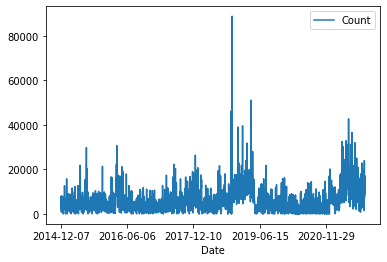

In [89]:
Data_Day.plot()

In [90]:
Data_Day['Count'].max()

88821

In [91]:
Data_Day.loc[Data_Day['Count'] == 88821]

,Count
Date,
2018-11-08,88821


After running the above code, I found that **2018-11-08** has a step count of 88821. I decide to drop this row as this is not making sense for a human to walk 80000+ steps within a day.

In [92]:
Data_Day = Data_Day.drop('2018-11-08')
Data_Hour = Data_Hour.drop('2018-11-08')

In [93]:
print(Data_Day['Count'].max())
print(Data_Hour['Count'].max())

58726
58726


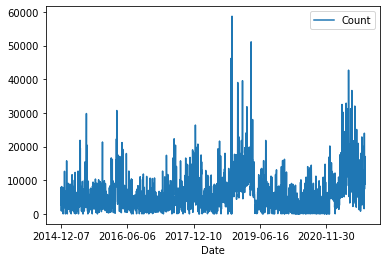

In [94]:
Data_Day.plot(kind='line')

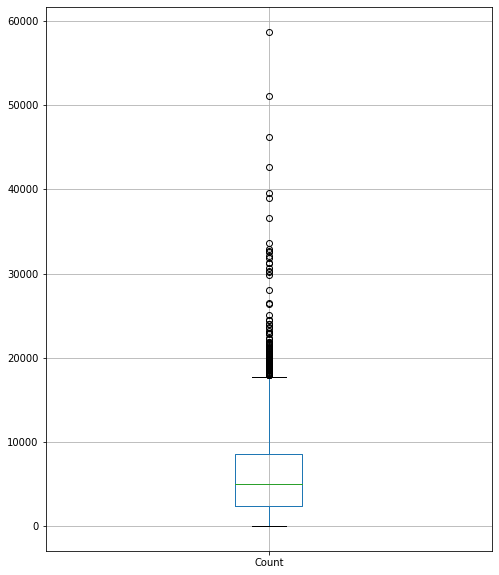

In [95]:
fig, ax = plt.subplots(figsize = (8,10))
Data_Day.boxplot()

While the data still has some issues as we can see from the above graph, there are multiple days with step counts over 20000. Which can also be considered as abnormal as for normal people, the daily step wouldn't be that much. This problem needs to be discussed in the next group meeting and find a proper solution.

Then I also try to merge these two datasets into one for future analysis to be easy. However, I've encountered a issue that the __*Hour*__ column cannot be displayed properly. This issue also need to be addressed in the future.

In [96]:
#Data_merged = pd.merge(Data_Hour, Data_Day, how="left", on=["Date"])
#Data_merged.rename(columns={'Count_x':'Count in each hour', 'Count_y':'Total count within a day'})
#Data_merge['count_y']=Data_merge['Count in each hour']
#Data.join(Data1.set_index("Date"), how = "left", on="Date")

# Week 9 Mini-Assignment notebook

As the driving question for our group is "**Was I more active in the last 12 months than the 12 months before that?**", I decide to analyze the monthly average step counts for each year from 2014 to 2021 to see if person 1 is more active in the last 12 months than the 12 months before that.

The first step is to reorganize the raw data and categorize step counts by years. Before reorganizing, we need to check if the data type of the column **Date** is "_**DateTime**_". Otherwise, we are unable to use the "**groupby**" function on the **Date** attribute.

In [97]:
rawData.dtypes

Source    object
Date      object
Hour      object
Count      int64
dtype: object

After checking the data types of each column in the raw data, I found that the type of  _**Date**_ column is "object" instead of "DateTime". The first step is to transform the object type into **"DateTime"**.

In [98]:
rawData['Date'] = pd.to_datetime(rawData['Date'])
rawData.dtypes

Source            object
Date      datetime64[ns]
Hour              object
Count              int64
dtype: object

Now the type of the _**Date**_ column has been transformed into **"DateTime"**. Then we can start to use "**groupby**" function to reorganize the dataset. And I create a new data frame to store the total step counts of person 1 for each year.

In [99]:
Data_yearTotal = rawData.groupby(rawData.Date.dt.year).sum()
Data_yearTotal

,Count
Date,
2014,111590
2015,1582971
2016,1742364
2017,1800474
2018,2339228
2019,2824389
2020,1239702
2021,3023933


In [100]:
Data_yearTotal.dtypes

Count    int64
dtype: object

Before plotting the graph and analyzing it, I need to remove the step count of an outlier in the dataset that I discovered previously to make the new dataset consistent with the others. As we know that outlier is the step count of 88821 steps on **2018-11-08**, we need to use the total step counts in 2018 minus the step counts on that specific day.

In [101]:
Data_yearTotal.at[2018,'Count']= 2339228-88821
Data_yearTotal

,Count
Date,
2014,111590
2015,1582971
2016,1742364
2017,1800474
2018,2250407
2019,2824389
2020,1239702
2021,3023933


Now the total step count of 2018 has been updated to **2250407**. While the data for 2014 only contains the data in December of 2014. The step count before December of 2014 is missing. So in this exploration, I decide to mutiple the step count of December of 2014 by **12** to simulate the total step count in 2014.

In [102]:
Data_yearTotal.at[2014,'Count']= 111590*12
Data_yearTotal

,Count
Date,
2014,1339080
2015,1582971
2016,1742364
2017,1800474
2018,2250407
2019,2824389
2020,1239702
2021,3023933


In [103]:
Data_yearTotal.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Date')

Now, I can calculate the monthly average step counts for each year and start to visualize the data.

In [104]:
Data_yearAvg = Data_yearTotal
Data_yearAvg['Count']=Data_yearAvg['Count']/12
Data_yearAvg['Count']=Data_yearAvg['Count'].astype(int)
Data_yearAvg

,Count
Date,
2014,111590
2015,131914
2016,145197
2017,150039
2018,187533
2019,235365
2020,103308
2021,251994


Now I can plot a relative graph to analyze the trend of person 1's monthly average step count of each year to see if he/she is more active in the last 12 months than the 12 months before that. Here I plot a trendline and a barplot to visualize the data.

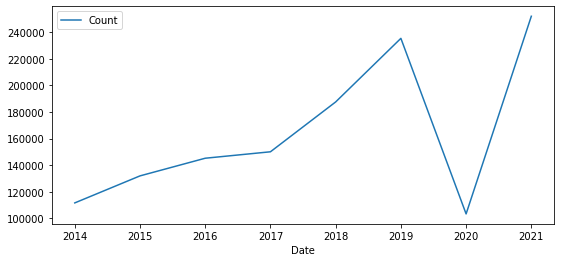

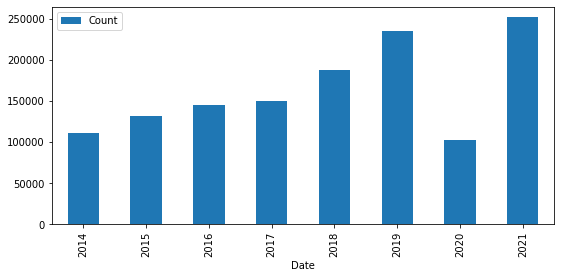

In [105]:
fig, ax = plt.subplots(figsize = (9,4))
Data_yearTotal.plot(y='Count', ax=ax)
Data_yearTotal.plot.bar(y="Count", figsize = (9,4))
fig.show()

Back to the driving question: **"Was I more active in the last 12 months than the 12 months before that?"**. As we can see from the trendline and the barplot, the total step counts from 2014 to 2019 is increasing, which implies that person 1 was more active than the previous year from 2014 to 2020. However, the total step counts of 2020 have decreased enormously compared to the total step counts of 2019. I can assume that person 1 has been impacted by the COVID-19 pandemic and became less active. The step count data in 2020 is complete as it records the data from 2020-01-02 to 2020-12-31. Therefore we can eliminate the possibility of inconsistency of the data.
While the total step count of 2021 has increased dramatically, which implies person 1 has recovered mostly from the pandemic and become more active compared to any years from 2014 to 2020.

In [150]:
mask = rawData['Date'].dt.year == int(2021)
include = rawData[mask]
include
#exclude = df[~mask]

,Source,Date,Hour,Count
156301,Person1 iPhone SE,2021-01-01,6,8
156302,Person1 iPhone SE,2021-01-01,13,38
156303,Person1 iPhone SE,2021-01-01,13,14
156304,Person1 iPhone SE,2021-01-01,13,375
156305,Person1 iPhone SE,2021-01-01,13,844
...,...,...,...,...
183782,Person1 iPhone SE,2021-09-22,17,1241
183783,Person1 iPhone SE,2021-09-22,17,1212
183784,Person1 iPhone SE,2021-09-22,18,808
183785,Person1 iPhone SE,2021-09-22,18,392


# Week 10 Mini-Assignment notebook

In last week's exploration, I simply grouped the raw data by years and the outputs are the monthly average step count for each year. It is easy to analyze and interpret. However, the time interval is 12 months from the start of the year to the end of the year. If a person wants to compare the activeness from the middle of the year to the middle of the next year(i.e. which is also an interval of 12 months). This model cannot help. Therefore, I want to establish a new way to help stakeholders to analyze the activeness no matter which month they want to start to compare with.

Instead of grouping the data only by year, I decide to group the data by both year and month.

In [173]:
MonthlyData = rawData.groupby([rawData.Date.dt.year, rawData.Date.dt.month]).sum()
MonthlyData

Count
Date Date        
2014 12    111590
2015 1     131321
     2     106851
     3     101621
     4      91726
...           ...
2021 5     518898
     6     406440
     7     360565
     8     321087
     9     205743

[82 rows x 1 columns]

After reorganizing the dataset, I can start plotting the trendline of this dataset. It shows the walking pattern of person 1 from 2014 to 2021. It illustrates that there are three peaks that the step counts increase enormously compared to the last month. While this isn't finished as it is hard to compare and interpret the activeness of 12 months intervals.

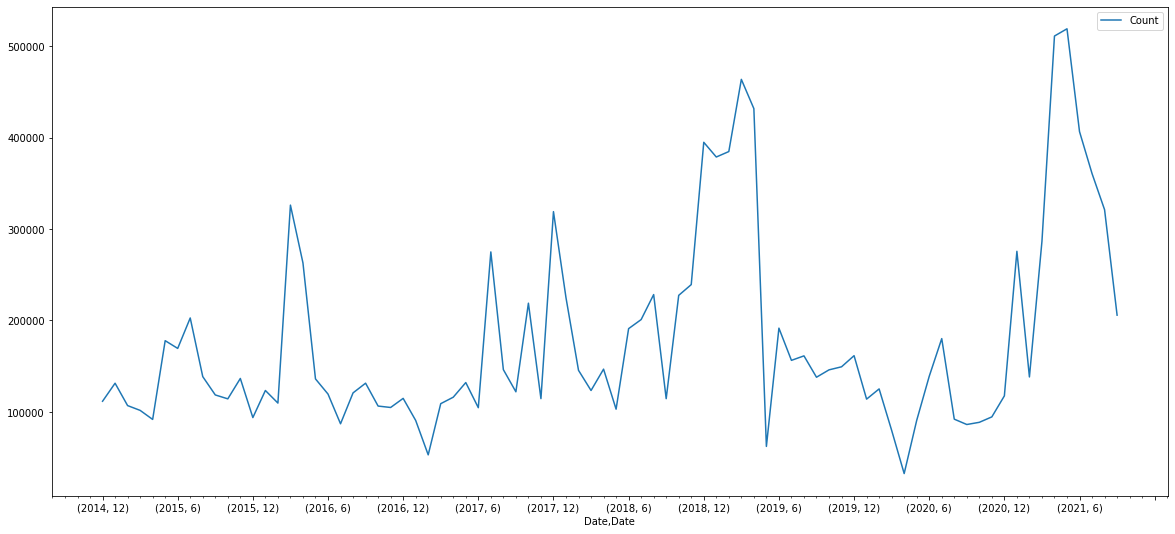

In [174]:
fig, ax = plt.subplots(figsize=(20,9))
tickspacing = 6
Mintickspacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspacing))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(Mintickspacing))
MonthlyData.plot(ax=ax)
#plt.xticks(rotation = 45)


In [175]:
MonthlyData.index

MultiIndex([(2014, 12),
            (2015,  1),
            (2015,  2),
            (2015,  3),
            (2015,  4),
            (2015,  5),
            (2015,  6),
            (2015,  7),
            (2015,  8),
            (2015,  9),
            (2015, 10),
            (2015, 11),
            (2015, 12),
            (2016,  1),
            (2016,  2),
            (2016,  3),
            (2016,  4),
            (2016,  5),
            (2016,  6),
            (2016,  7),
            (2016,  8),
            (2016,  9),
            (2016, 10),
            (2016, 11),
            (2016, 12),
            (2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6),
            (2017,  7),
            (2017,  8),
            (2017,  9),
            (2017, 10),
            (2017, 11),
            (2017, 12),
            (2018,  1),
            (2018,  2),
            (2018,  3),
            (2018,  4),
            (201

The indexes of the dataset "__MonthlyData__" are **MultiIndex**. Using MultiIndex is harder to do data wrangling than a single index. Therefore, I use the "**_.unstack_**" function to pivot a level of the index labels. It returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. 

In [128]:
MonthlyData_unstack = MonthlyData.unstack(1)
MonthlyData_unstack.rename(columns = {'Count':'Month'}, inplace=True)
MonthlyData_unstack

Month                      ...                              
Date        1         2         3   ...        10        11        12
Date                                ...                              
2014       NaN       NaN       NaN  ...       NaN       NaN  111590.0
2015  131321.0  106851.0  101621.0  ...  114230.0  136521.0   93739.0
2016  123366.0  109612.0  326088.0  ...  106339.0  104795.0  114742.0
2017   90613.0   52991.0  108961.0  ...  218839.0  114464.0  318965.0
2018  224852.0  145428.0  123369.0  ...  227409.0  239160.0  394777.0
2019  378698.0  384654.0  463604.0  ...  145937.0  149279.0  161444.0
2020  113927.0  125089.0   79801.0  ...   88564.0   94503.0  117473.0
2021  275575.0  138177.0  286459.0  ...       NaN       NaN       NaN

[8 rows x 12 columns]

Now, the dataset has a brand new layout that the years are the row and the months are the columns. I want to transpose the rows and the columns that the rows are the months and the columns are the years. So, I use the "_**.T**_" function to rearrange the dataset into a new format.

In [129]:
MonthlyData_tr = MonthlyData_unstack.T

In [140]:
MonthlyData_tr.columns
MonthlyData_tr

Date            2014      2015      2016  ...      2019      2020      2021
      Date                                ...                              
Month 1          NaN  131321.0  123366.0  ...  378698.0  113927.0  275575.0
      2          NaN  106851.0  109612.0  ...  384654.0  125089.0  138177.0
      3          NaN  101621.0  326088.0  ...  463604.0   79801.0  286459.0
      4          NaN   91726.0  262838.0  ...  431606.0   32527.0  510989.0
      5          NaN  177845.0  136031.0  ...   62203.0   90651.0  518898.0
      6          NaN  169385.0  119474.0  ...  191545.0  138863.0  406440.0
      7          NaN  202681.0   86969.0  ...  156318.0  180116.0  360565.0
      8          NaN  138543.0  120755.0  ...  161227.0   92018.0  321087.0
      9          NaN  118508.0  131355.0  ...  137874.0   86170.0  205743.0
      10         NaN  114230.0  106339.0  ...  145937.0   88564.0       NaN
      11         NaN  136521.0  104795.0  ...  149279.0   94503.0       NaN
      12    111590.0   93739.0  114742.0  ...  161444.0  117473.0       NaN

[12 rows x 8 columns]

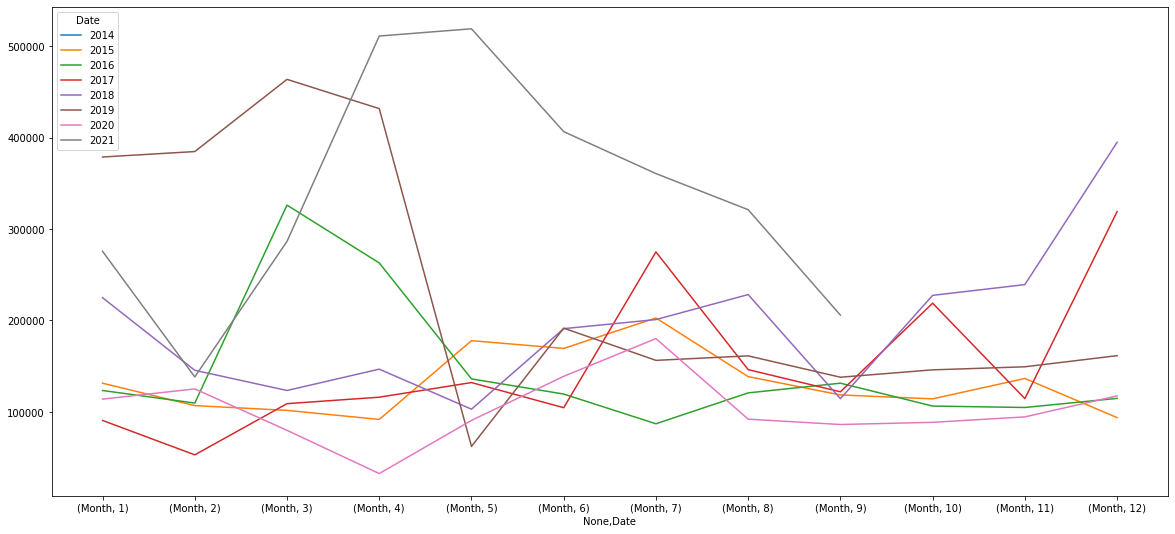

In [148]:
fig, ax = plt.subplots(figsize=(20,9))
tickspacing = 1
Mintickspacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspacing))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(Mintickspacing))
MonthlyData_tr.plot(ax=ax) 

After rearranging the dataset, I can now plot the trendline of each year's step account into one plot and enable stakeholders to compare the activeness from any time they want. However, it is still hard to interpret as the lines are intertwined together and there is no marker for each months step counts. Hence, I imported the "**plotly**" library to enhance the visualization effect of the plot and add the interaction feature that allows stakeholders to read the exact step count when the cursor moves to any markers.

In [172]:
Month = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
fig = px.line()
try:
  for i,n in enumerate(MonthlyData_tr[1:7]):
    fig.add_scatter(x=Month, y=MonthlyData_tr[MonthlyData_tr.columns[i+1]], name = str(MonthlyData_tr.columns[i+1]))
except:
  pass
#fig.show()
fig.update_traces(mode='markers+lines') 
fig.update_layout(  
title = 'Monthly Step Count for each year from 2014 to 2021'  
,xaxis_title = 'Month'  
,yaxis_title = 'Number of steps'  
,font = dict(size = 25)  
,template = 'plotly_dark' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"  
)  